### Load library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint


### Upload data

The project uses an exemplary set of data (images) CIFAR-10 available in Keras.
The CIFAR-10 are labeled subsets of tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


In [2]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
 
print(f'Training set: {X_train.shape}.\n Test set: {X_test.shape}')


Training set: (50000, 32, 32, 3).
 Test set: (10000, 32, 32, 3)


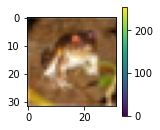

In [3]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

### Class name of each image. 

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

### Data check

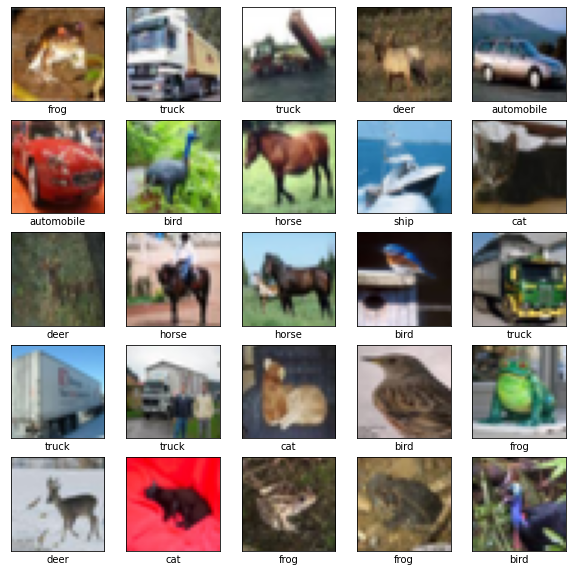

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[y_train[i][0]])
plt.show()

### Data preparation

In [6]:
# Normalize data to <0,1>

X_train, X_test = X_train / 255.0, X_test / 255.0;


In [7]:
#One Hot codding for target value

y_train, y_test = to_categorical(y_train, len(class_names)), to_categorical(y_test, len(class_names));


### Model

In [8]:
#Model building

#Sequential model API
model = Sequential();
model.add(Flatten(input_shape=(32, 32, 3)));
model.add(Dense(128, activation='relu'));
model.add(Dropout(0.2));
model.add(Dense(64, activation='relu'));
model.add(Dropout(0.2));
model.add(Dense(32, activation='relu'));
model.add(Dropout(0.2));
model.add(Dense(10, activation = 'softmax'));

model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy']);

#Early stopping method to avoid overtraining
EarlyStop = EarlyStopping(monitor='val_loss', 
                          patience=5,
                          verbose=1);

#Save the best model
ModelCheck = ModelCheckpoint(filepath='best_model.h5',
                             monitor='var_loss',
                             save_best_only=True);

model.summary();

#Training the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=50,
                    validation_data = (X_test, y_test),
                    callbacks = [EarlyStop, ModelCheck]
                   );


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

1563/1563 [==============================] - 5s 3ms/step - loss: 0.2634 - accuracy: 0.3615 - val_loss: 0.2517 - val_accuracy: 0.4126
Epoch 32/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2623 - accuracy: 0.3660 - val_loss: 0.2502 - val_accuracy: 0.4120
Epoch 33/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2626 - accuracy: 0.3638 - val_loss: 0.2492 - val_accuracy: 0.4075
Epoch 34/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2617 - accuracy: 0.3672 - val_loss: 0.2517 - val_accuracy: 0.4035
Epoch 35/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2599 - accuracy: 0.3773 - val_loss: 0.2523 - val_accuracy: 0.3974
Epoch 36/50
1563/1563 [==============================] - 5s 4ms/step - loss: 0.2609 - accuracy: 0.3684 - val_loss: 0.2521 - val_accuracy: 0.4054
Epoch 37/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2608 - accuracy: 0.3685 - val_loss: 0.2502 - val_accuracy: 0.41

### Training results

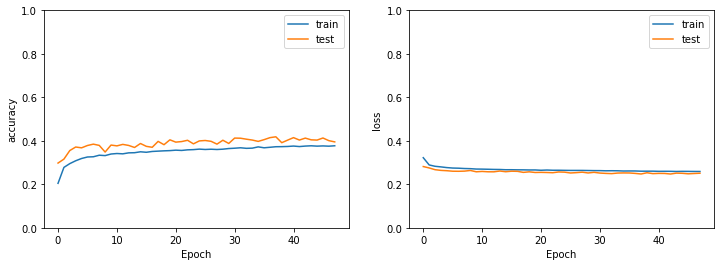

In [9]:
def results(model, metric1='accuracy', ylim1=(0.0, 1.0), 
                metric2='loss', ylim2=(0.0, 1.0)):
    plt.figure(figsize=(12,4))
     
    plt.subplot(1, 2, 1)
    plt.plot(history.history[metric1])
    plt.plot(history.history['val_' + metric1])
    plt.ylabel(metric1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history[metric2],)
    plt.plot(history.history['val_' + metric2],)
    plt.ylabel(metric2)
    plt.xlabel('Epoch')
    plt.ylim(ylim2)
    plt.legend(['train', 'test'], loc='best')
     
    plt.show()
     
results(history, 'accuracy', (0.0, 1), 'loss', (0.0, 1))

### Prediction

In [10]:
y_train_pred, y_test_pred = model.predict(X_train), model.predict(X_test) 


### Prediction results

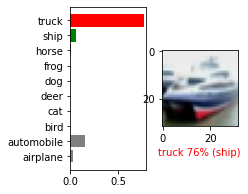

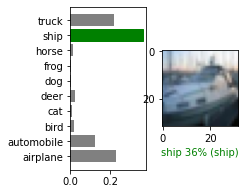

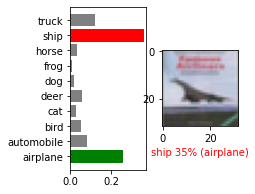

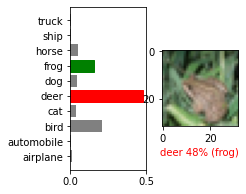

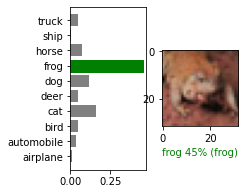

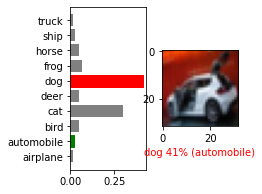

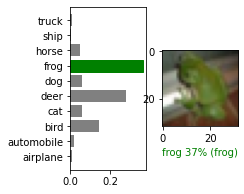

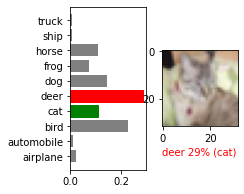

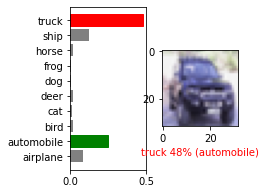

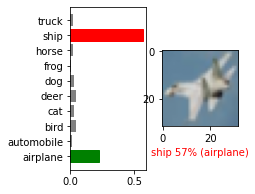

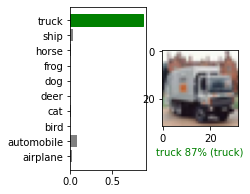

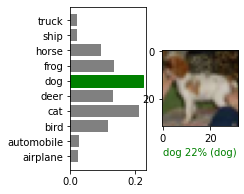

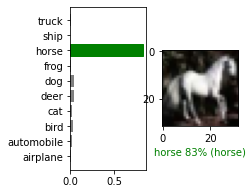

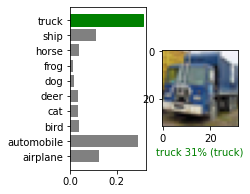

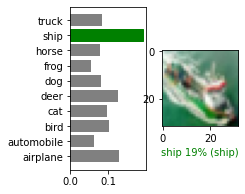

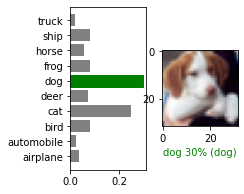

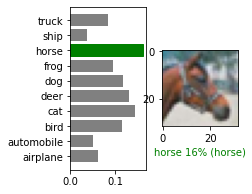

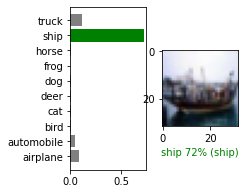

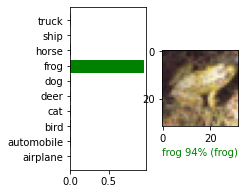

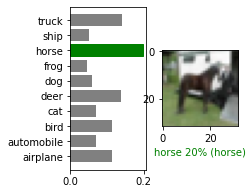

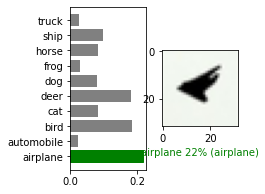

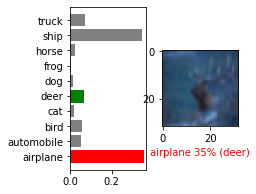

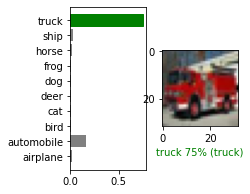

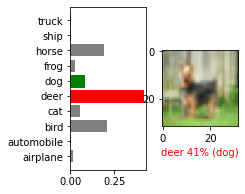

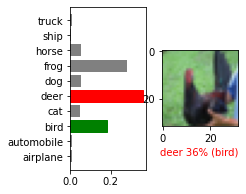

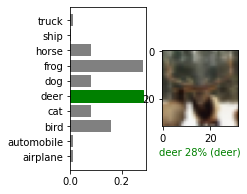

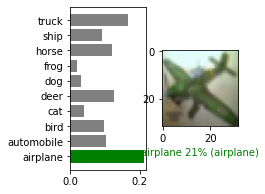

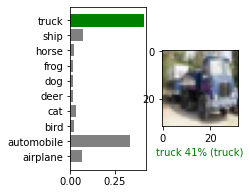

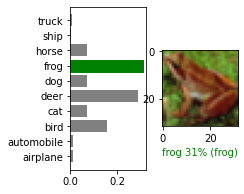

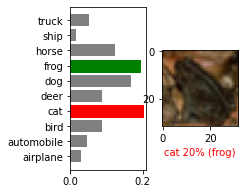

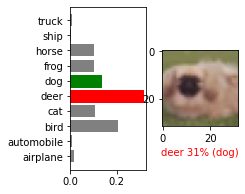

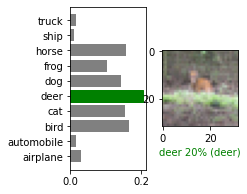

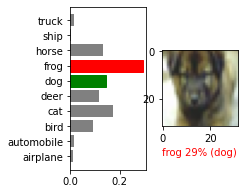

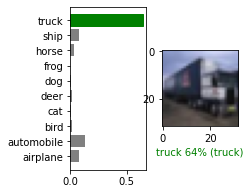

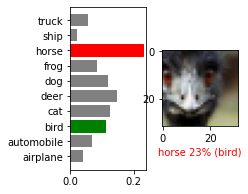

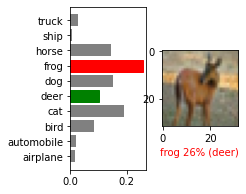

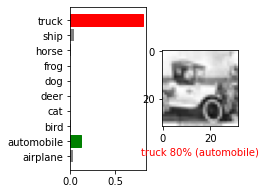

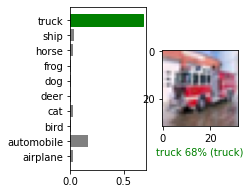

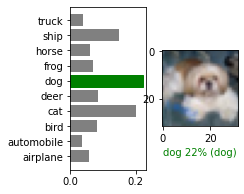

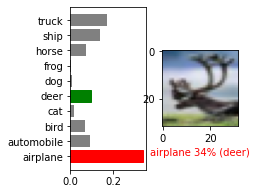

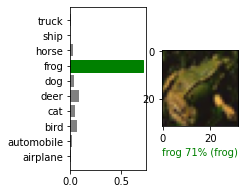

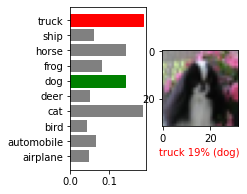

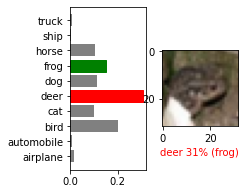

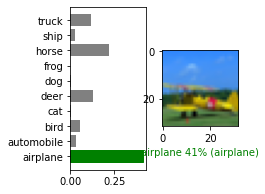

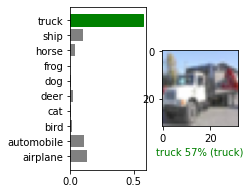

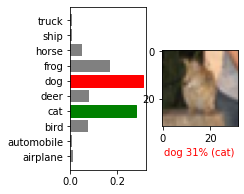

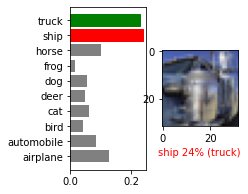

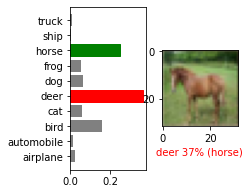

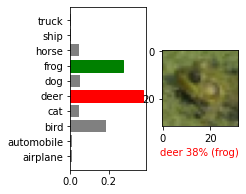

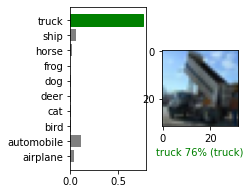

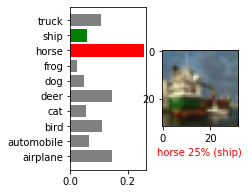

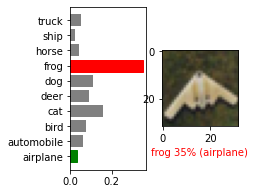

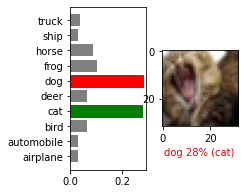

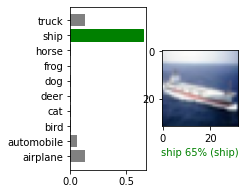

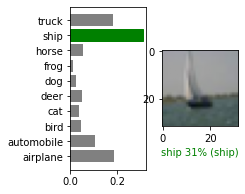

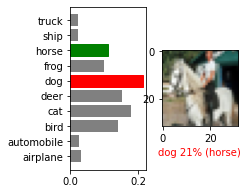

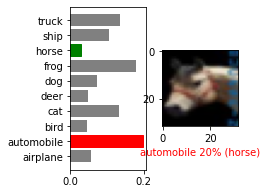

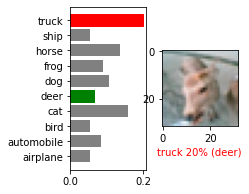

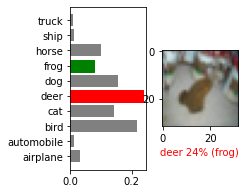

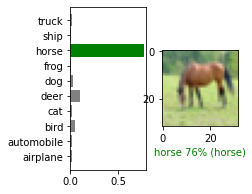

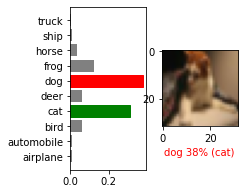

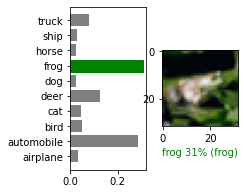

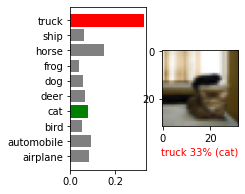

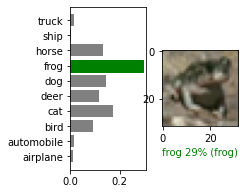

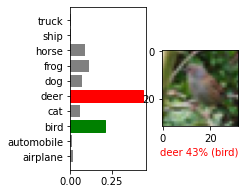

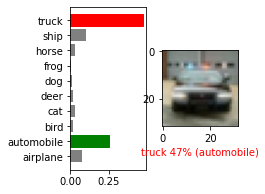

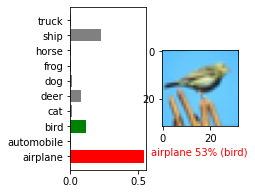

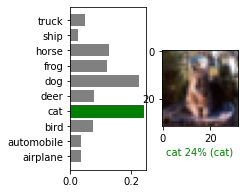

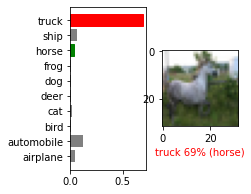

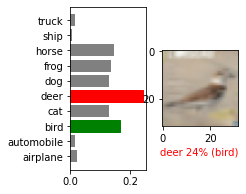

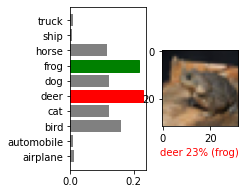

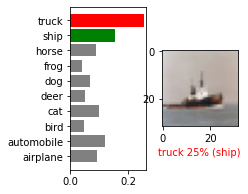

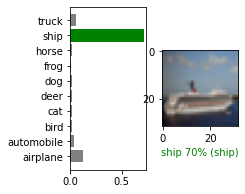

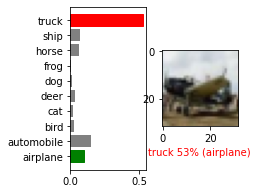

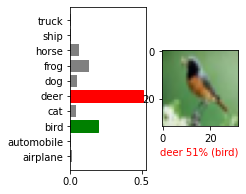

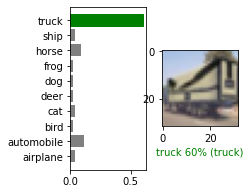

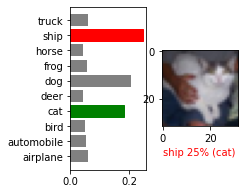

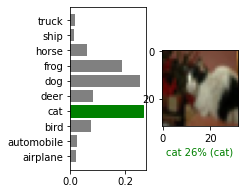

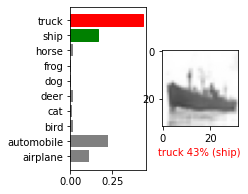

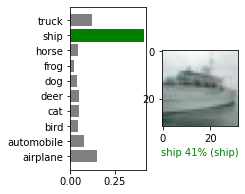

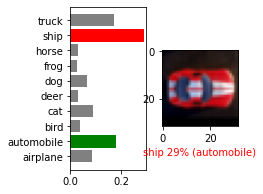

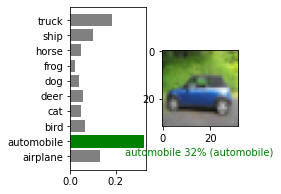

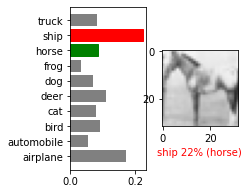

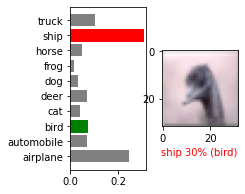

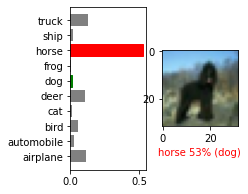

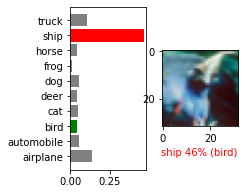

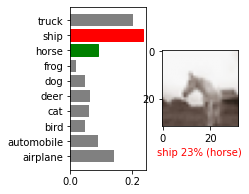

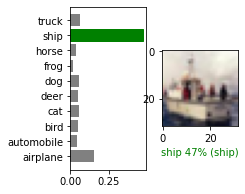

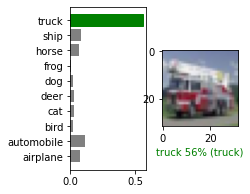

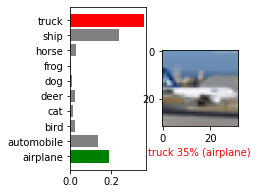

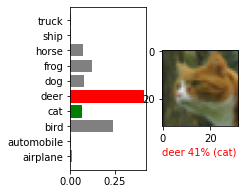

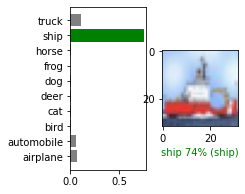

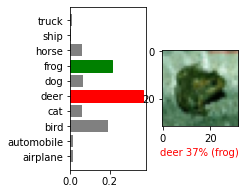

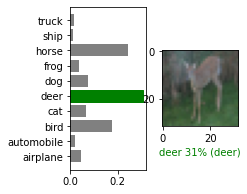

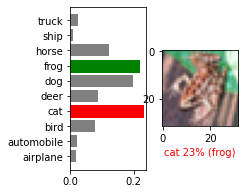

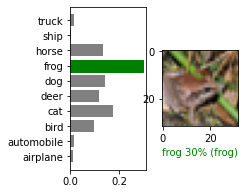

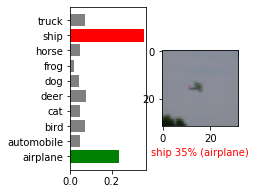

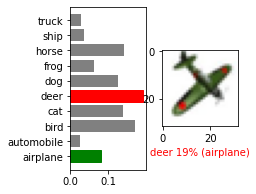

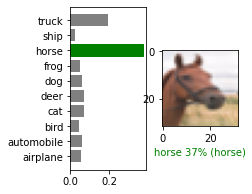

In [11]:
def plot_value_img(i, predictions, target_value, data):
    predictions, target_value, data = predictions[i], target_value[i], data[i]    
    predicted_label = np.argmax(predictions)
    true_value = np.argmax(target_value)   
     
    plt.figure(figsize=(3,3))
     
    plt.subplot(1, 2, 1)
     
    plt.yticks(np.arange(len(class_names)), class_names)
    thisplot = plt.barh(range(10), predictions, color="gray")      
    thisplot[predicted_label].set_color('r')
    thisplot[true_value].set_color('g')
 
    plt.subplot(1, 2, 2) 
     
    plt.imshow(data, cmap=plt.cm.binary)
    if predicted_label == true_value:
        color = 'green'
    else:
        color = 'red'
 
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions),
                                class_names[true_value]),
                                color=color)    
    plt.show()

for i in range(1,100):
    plot_value_img(i, y_test_pred,  y_test, X_test);
    